In [3]:
from __future__ import division

import tweepy # Helps in getting tweets 
from textblob import TextBlob # For getting tweet's subjectivity and polarity
from twython import Twython # Helps in getting tweets 
from wordcloud import WordCloud # Helps in forming a word cloud
import pandas as pd # Making and Manipulating a dataframe
import numpy as np # Helps in various vector and matrix calculations
import re # The Regex library
import matplotlib.pyplot as plt # For plotting various visualizations
from functools import reduce # An important method which will help in joining data frames
plt.style.use('fivethirtyeight')
import os # The os library to get current path and various other things
from PIL import Image # To get a mask for the word cloud



In [4]:
df1 = pd.read_csv('data1.csv') # Reading the first file
df1.drop(df1.columns[0],axis=1,inplace=True)

In [5]:
df2 = pd.read_csv('data2.csv')# Reading the second file
df2.drop(df2.columns[0],axis=1,inplace=True)

In [6]:
df3 = pd.read_csv('data3.csv')# Reading the third file
df3.drop(df3.columns[0],axis=1,inplace=True)

In [7]:
df4 = pd.read_csv('data4.csv')# Reading the fourth file
df4.drop(df4.columns[0],axis=1,inplace=True)

In [8]:
data_frames = [df1, df2, df3, df4] # Making a list of all dataframes
df1.head() # Checking the df

,tweet_id,tweets,tweet_text,Subjectivity,Polarity,Sentiment,location,retweets,response,date
0,1242694084235530241,{'created_at': 'Wed Mar 25 06:05:32 +0000 2020...,"Corona time - Good morning, suddenly I just wa...",0.550000,0.350000,Positive,Tel Aviv,0,NaN,2020-03-25
1,1242694694590541825,{'created_at': 'Wed Mar 25 06:07:57 +0000 2020...,Isolation gear and a SUV and no cops. Weird. I...,1.000000,-0.500000,Negative,"Portsmouth, RI",0,NaN,2020-03-25
2,1242694966297735169,{'created_at': 'Wed Mar 25 06:09:02 +0000 2020...,liveleak More Cooties than Corona?,0.500000,0.500000,Positive,"Warszawa, Polska",0,NaN,2020-03-25
3,1242695415037857793,{'created_at': 'Wed Mar 25 06:10:49 +0000 2020...,FIGHT DA VIRUS WITH DA GOAT TFITNES6 LAST PUSH...,0.066667,0.000000,Neutral,"Johannesburg, South Africa",0,NaN,2020-03-25
4,1242695498382934017,{'created_at': 'Wed Mar 25 06:11:09 +0000 2020...,Share it with your Loved Ones and Keep Social ...,0.288889,0.244444,Positive,"New York, NY",0,NaN,2020-03-25


In [9]:
df = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id','tweets','tweet_text','Subjectivity', 'Polarity', 'Sentiment','retweets','response','date','location'],
                                            how='outer'), data_frames)# Joining all the dataframes using reduce and merge

In [10]:
df.head()

,tweet_id,tweets,tweet_text,Subjectivity,Polarity,Sentiment,location,retweets,response,date
0,1242694084235530241,{'created_at': 'Wed Mar 25 06:05:32 +0000 2020...,"Corona time - Good morning, suddenly I just wa...",0.550000,0.350000,Positive,Tel Aviv,0,NaN,2020-03-25
1,1242694694590541825,{'created_at': 'Wed Mar 25 06:07:57 +0000 2020...,Isolation gear and a SUV and no cops. Weird. I...,1.000000,-0.500000,Negative,"Portsmouth, RI",0,NaN,2020-03-25
2,1242694966297735169,{'created_at': 'Wed Mar 25 06:09:02 +0000 2020...,liveleak More Cooties than Corona?,0.500000,0.500000,Positive,"Warszawa, Polska",0,NaN,2020-03-25
3,1242695415037857793,{'created_at': 'Wed Mar 25 06:10:49 +0000 2020...,FIGHT DA VIRUS WITH DA GOAT TFITNES6 LAST PUSH...,0.066667,0.000000,Neutral,"Johannesburg, South Africa",0,NaN,2020-03-25
4,1242695498382934017,{'created_at': 'Wed Mar 25 06:11:09 +0000 2020...,Share it with your Loved Ones and Keep Social ...,0.288889,0.244444,Positive,"New York, NY",0,NaN,2020-03-25


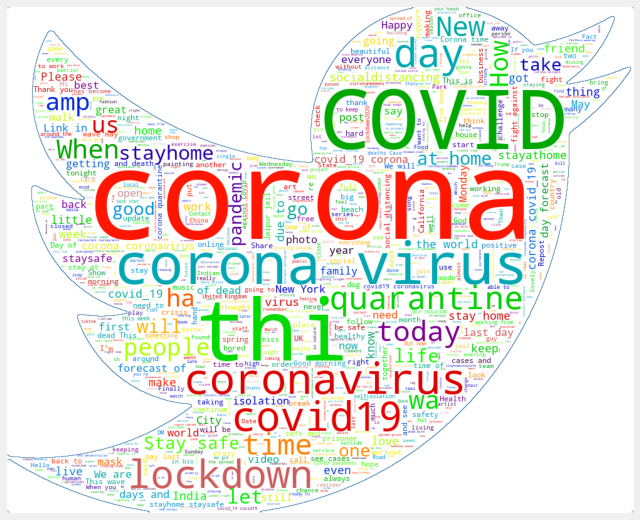

In [11]:
file = os.getcwd()

allWords = ' '.join([twts for twts in df['tweet_text']])

#We read the mask image into a numpy array
twitter_mask = np.array(Image.open(os.path.join(file, "twitter_mask.png")))
#We generate the wordcloud using the series created and the mask 
word_cloud = WordCloud(width=2000, height=1000, max_font_size=200, 
                       background_color="white", max_words=2000, mask=twitter_mask, 
                       contour_width=1, contour_color="steelblue", 
                       colormap="nipy_spectral").generate(allWords)

#Now we plot the figure
plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation="hermite")
plt.axis("off")    
plt.show()   


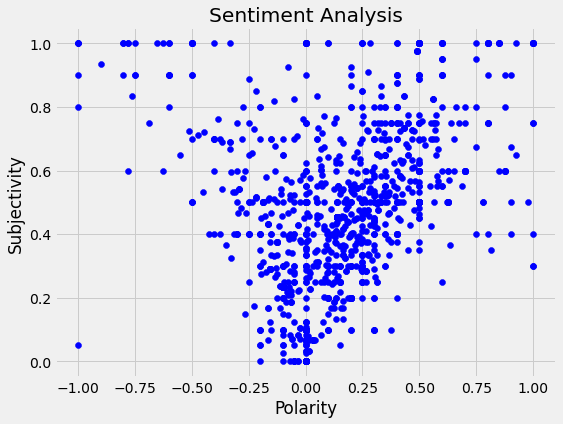

In [12]:
 # Plotting the polarity against subjectivity
plt.figure(figsize=(8,6)) 
for i in df.index:
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

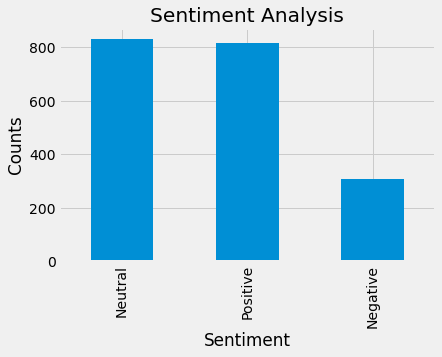

In [13]:
# Plotting the sentiment of the people
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Sentiment'].value_counts().plot(kind = 'bar')
plt.show()

In [15]:
# Storing data in  a csv for further usage.
data = df.to_csv('data.csv')